# 1. 导入所有必需的库

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # 一个用于分类的“月牙形”数据集
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 让图像在 Notebook 中直接显示
%matplotlib inline
# 设置图像的清晰度
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = ['PingFang SC', 'STHeiti', 'AppleGothic', 'Arial Unicode MS', 'Noto Sans CJK SC']
plt.rcParams['axes.unicode_minus'] = False    # 负号正常显示

print("--- 1. 库已导入 ---")

--- 1. 库已导入 ---


# 2. 创建我们的“演练场”

/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20204 (\N{CJK UNIFIED IDEOGRAPH-4EEC}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


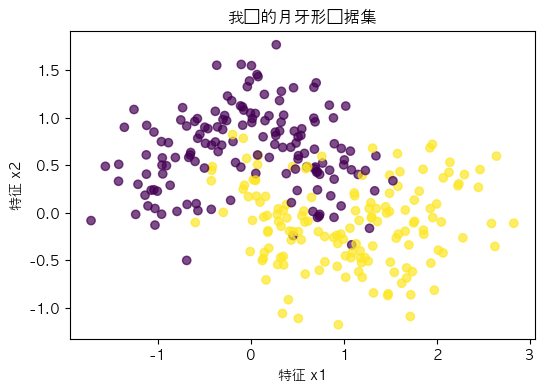

--- 2. 数据集已创建并显示 ---


In [ ]:
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# 我们可以画出数据点，看看它长什么样
plt.figure(figsize=(6, 4)) # 创建一个小画布
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("月牙形数据集")
plt.xlabel("特征 x1")
plt.ylabel("特征 x2")
plt.show()

print("--- 2. 数据集已创建并显示 ---")

# 3. 创建两个“驯兽师”（模型）

In [8]:
# 驯兽师A: “野蛮生长”（不剪枝）
tree_overfit = DecisionTreeClassifier(random_state=42)

# 驯兽师B: “严格管教”（预剪枝）
tree_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# 4. 开始“驯服”！(训练模型)

In [9]:
tree_overfit.fit(X, y)
tree_pruned.fit(X, y)

print("--- 3. 两个模型都训练完成了！ ---")
print(f"'野蛮生长'的树，最终深度达到了: {tree_overfit.get_depth()}")
print(f"'严格管教'的树，最终深度是: {tree_pruned.get_depth()}")


--- 3. 两个模型都训练完成了！ ---
'野蛮生长'的树，最终深度达到了: 12
'严格管教'的树，最终深度是: 3


# 5. 可视化对比：看看两棵树长什么样


--- 4. 正在生成对比图... ---


/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34542 (\N{CJK UNIFIED IDEOGRAPH-86EE}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36807 (\N{CJK UNIFIED IDEOGRAPH-8FC7}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20005 (\N{

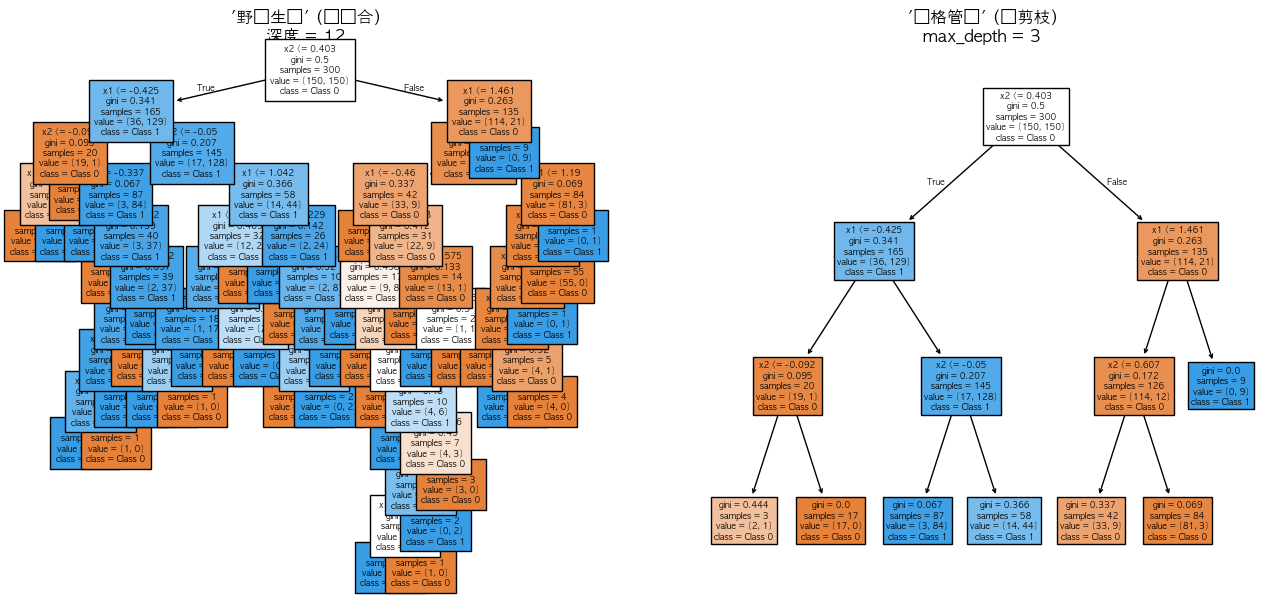

In [10]:

print("\n--- 4. 正在生成对比图... ---")

# 创建一个 1x2 的画布，用于并排比较
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# --- 画左边的树 --- 
plot_tree(tree_overfit, 
          filled=True, 
          ax=axes[0], 
          feature_names=['x1', 'x2'], 
          class_names=['Class 0', 'Class 1'],
          fontsize=6) # 把字体调小一点，不然看不全

axes[0].set_title(f"'野蛮生长' (过拟合)\n深度 = {tree_overfit.get_depth()}", fontsize=12)

# --- 画右边的树 --- 
plot_tree(tree_pruned, 
          filled=True, 
          ax=axes[1], 
          feature_names=['x1', 'x2'], 
          class_names=['Class 0', 'Class 1'])

axes[1].set_title(f"'严格管教' (预剪枝)\nmax_depth = 3", fontsize=12)

plt.show()